## Setup

In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 6.2 MB/s 


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import re
from glob import glob
import random
from PIL import Image
import matplotlib.pyplot as plt
import math
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
train = glob('/content/drive/MyDrive/data/cat&dog/train/*.jpg')
random.shuffle(train)
print(len(train))
print(train[:5])

25000
['/content/drive/MyDrive/data/cat&dog/train/cat.383.jpg', '/content/drive/MyDrive/data/cat&dog/train/dog.4495.jpg', '/content/drive/MyDrive/data/cat&dog/train/dog.4837.jpg', '/content/drive/MyDrive/data/cat&dog/train/dog.12309.jpg', '/content/drive/MyDrive/data/cat&dog/train/dog.4374.jpg']


In [ ]:
#임의의 경로
path = train[0]
path

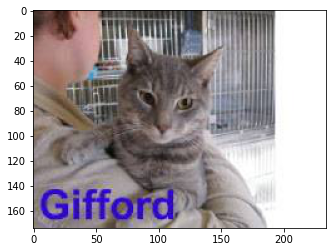

In [ ]:
 #Image 확인
image_pil = Image.open(path) #해당 경로의 이미지를 열어줍니다
image = np.array(image_pil) #저희는 행렬로 변환해야 하기 때문에 numpy module을 활용해줍니다
plt.imshow(image)

In [ ]:
# 임의의 labeling
path = train[0]
path_base = os.path.basename(path) # 가장 최하위 파일 경로명을 return
print('path_base : ',path_base)
label = path_base[:3]
print('label : ',label) # Label 추출

path_base :  cat.6886.jpg
label :  cat


In [ ]:
def make_image(path):
    image_pil = Image.open(path)
    image_pil = image_pil.resize((224,224)) #위의 data 경우에는 이미지 크기가 다 다르므로 28,28 사이즈로 통일해주었습니다. 이는 원하시는대로 바꾸시면 됩니다
    image = np.array(image_pil)
    return image


def get_label(path):
    path_base = os.path.basename(path)
    label = path_base[:3]
    return label

In [ ]:
temp_path = train[5]
image_temp = make_image(temp_path)
label_temp = get_label(temp_path)

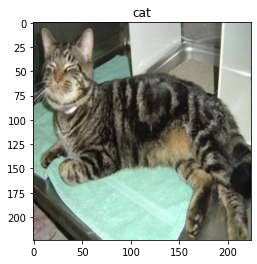

In [ ]:
plt.imshow(image_temp)
plt.title(label_temp)
plt.show()

In [ ]:
image_temp.shape

(224, 224, 3)

In [ ]:
from tqdm import tqdm

In [ ]:
X = []
y = []
for path in tqdm(train):
    img = make_image(path)
    label = get_label(path)
    X.append(img)
    y.append(label)

100%|██████████| 25000/25000 [12:02<00:00, 34.61it/s] 


In [ ]:
# 행렬로 변환
X = np.array(X)
X.shape

(25000, 224, 224, 3)

In [ ]:
for i in range(len(y)):
    if y[i] == 'cat':
        y[i] = 0
    else:
        y[i] = 1
y

In [ ]:
y = np.array(y)
y = y.reshape((-1,1))
y.shape

(25000, 1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
print("X shape : ", x_train.shape)
print("y shape : ", y_train.shape)
print("X shape : ", x_test.shape)
print("y shape : ", y_test.shape)

X shape :  (20000, 224, 224, 3)
y shape :  (20000, 1)
X shape :  (5000, 224, 224, 3)
y shape :  (5000, 1)


# 넘파이 저장 및 불러오기
## 램을 너무 많이 잡아 먹어서 모듈 임포트 한 다음 여기서부터 다시 시작함

In [ ]:
#np.save('x_train.npy', x_train)

In [ ]:
#np.save('x_test.npy', x_test)

In [ ]:
#np.save('y_train.npy', y_train)

In [ ]:
#np.save('y_test.npy', y_test)

In [ ]:
x_train = np.load('/content/drive/MyDrive/x_train.npy')
x_train.shape

(20000, 224, 224, 3)

In [ ]:
x_test = np.load('/content/drive/MyDrive/x_test.npy')
x_test.shape

(5000, 224, 224, 3)

In [ ]:
y_train = np.load('/content/drive/MyDrive/y_train.npy')
y_train.shape

(20000, 1)

In [ ]:
y_test = np.load('/content/drive/MyDrive/y_test.npy')
y_test.shape

(5000, 1)

In [ ]:
# import math
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# import tensorflow_addons as tfa
# import matplotlib.pyplot as plt
# from tensorflow.keras import layers

# Setting seed for reproducibiltiy
SEED = 42
keras.utils.set_random_seed(SEED)

## Prepare the data

In [ ]:
NUM_CLASSES = 2
INPUT_SHAPE = (224, 224, 3)

# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (20000, 224, 224, 3) - y_train shape: (20000, 1)
x_test shape: (5000, 224, 224, 3) - y_test shape: (5000, 1)


## Configure the hyperparameters

The hyperparameters are different from the paper. Feel free to tune
the hyperparameters yourself.

In [ ]:
# DATA
BUFFER_SIZE = 1024
BATCH_SIZE = 64

# AUGMENTATION
IMAGE_SIZE = 224
PATCH_SIZE = 14
NUM_PATCHES = (IMAGE_SIZE // PATCH_SIZE) ** 2

# OPTIMIZER
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001

# TRAINING
EPOCHS = 100

# ARCHITECTURE
LAYER_NORM_EPS = 1e-6
TRANSFORMER_LAYERS = 8
PROJECTION_DIM = 64
NUM_HEADS = 4
TRANSFORMER_UNITS = [
    PROJECTION_DIM * 2,
    PROJECTION_DIM,
]
MLP_HEAD_UNITS = [512, 256]

## Use data augmentation

A snippet from the paper:

*"According to DeiT, various techniques are required to effectively
train ViTs. Thus, we applied data augmentations such as CutMix, Mixup,
Auto Augment, Repeated Augment to all models."*

In this example, we will focus solely on the novelty of the approach
and not on reproducing the paper results. For this reason, we
don't use the mentioned data augmentation schemes. Please feel
free to add to or remove from the augmentation pipeline.

In [ ]:
# data_augmentation = keras.Sequential(
#     [
#         layers.Normalization(),
#         layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
#         layers.RandomFlip("horizontal"),
#         layers.RandomRotation(factor=0.02),
#         layers.RandomZoom(height_factor=0.2, width_factor=0.2),
#     ],
#     name="data_augmentation",
# )
# # Compute the mean and the variance of the training data for normalization.
# data_augmentation.layers[0].adapt(x_train)

## Implement Shifted Patch Tokenization

In a ViT pipeline, the input images are divided into patches that are
then linearly projected into tokens. Shifted patch tokenization (STP)
is introduced to combat the low receptive field of ViTs. The steps
for Shifted Patch Tokenization are as follows:

- Start with an image.
- Shift the image in diagonal directions.
- Concat the diagonally shifted images with the original image.
- Extract patches of the concatenated images.
- Flatten the spatial dimension of all patches.
- Layer normalize the flattened patches and then project it.

| ![Shifted Patch Toekenization](https://i.imgur.com/bUnHxd0.png) |
| :--: |
| Shifted Patch Tokenization [Source](https://arxiv.org/abs/2112.13492v1) |

In [ ]:

class ShiftedPatchTokenization(layers.Layer):
    def __init__(
        self,
        image_size=IMAGE_SIZE,
        patch_size=PATCH_SIZE,
        num_patches=NUM_PATCHES,
        projection_dim=PROJECTION_DIM,
        vanilla=False,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.vanilla = vanilla  # Flag to swtich to vanilla patch extractor
        self.image_size = image_size
        self.patch_size = patch_size
        self.half_patch = patch_size // 2
        self.flatten_patches = layers.Reshape((num_patches, -1))
        self.projection = layers.Dense(units=projection_dim)
        self.layer_norm = layers.LayerNormalization(epsilon=LAYER_NORM_EPS)

    def crop_shift_pad(self, images, mode):
        # Build the diagonally shifted images
        if mode == "left-up":
            crop_height = self.half_patch
            crop_width = self.half_patch
            shift_height = 0
            shift_width = 0
        elif mode == "left-down":
            crop_height = 0
            crop_width = self.half_patch
            shift_height = self.half_patch
            shift_width = 0
        elif mode == "right-up":
            crop_height = self.half_patch
            crop_width = 0
            shift_height = 0
            shift_width = self.half_patch
        else:
            crop_height = 0
            crop_width = 0
            shift_height = self.half_patch
            shift_width = self.half_patch

        # Crop the shifted images and pad them
        crop = tf.image.crop_to_bounding_box(
            images,
            offset_height=crop_height,
            offset_width=crop_width,
            target_height=self.image_size - self.half_patch,
            target_width=self.image_size - self.half_patch,
        )
        shift_pad = tf.image.pad_to_bounding_box(
            crop,
            offset_height=shift_height,
            offset_width=shift_width,
            target_height=self.image_size,
            target_width=self.image_size,
        )
        return shift_pad

    def call(self, images):
        if not self.vanilla:
            # Concat the shifted images with the original image
            images = tf.concat(
                [
                    images,
                    self.crop_shift_pad(images, mode="left-up"),
                    self.crop_shift_pad(images, mode="left-down"),
                    self.crop_shift_pad(images, mode="right-up"),
                    self.crop_shift_pad(images, mode="right-down"),
                ],
                axis=-1,
            )
        # Patchify the images and flatten it
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        flat_patches = self.flatten_patches(patches)
        if not self.vanilla:
            # Layer normalize the flat patches and linearly project it
            tokens = self.layer_norm(flat_patches)
            tokens = self.projection(tokens)
        else:
            # Linearly project the flat patches
            tokens = self.projection(flat_patches)
        return (tokens, patches)


### Visualize the patches

In [ ]:
# # Get a random image from the training dataset
# # and resize the image
# image = x_train[np.random.choice(range(x_train.shape[0]))]
# resized_image = tf.image.resize(
#     tf.convert_to_tensor([image]), size=(IMAGE_SIZE, IMAGE_SIZE)
# )

# # Vanilla patch maker: This takes an image and divides into
# # patches as in the original ViT paper
# (token, patch) = ShiftedPatchTokenization(vanilla=True)(resized_image / 255.0)
# (token, patch) = (token[0], patch[0])
# n = patch.shape[0]
# count = 1
# plt.figure(figsize=(4, 4))
# for row in range(n):
#     for col in range(n):
#         plt.subplot(n, n, count)
#         count = count + 1
#         image = tf.reshape(patch[row][col], (PATCH_SIZE, PATCH_SIZE, 3))
#         plt.imshow(image)
#         plt.axis("off")
# plt.show()

# # Shifted Patch Tokenization: This layer takes the image, shifts it
# # diagonally and then extracts patches from the concatinated images
# (token, patch) = ShiftedPatchTokenization(vanilla=False)(resized_image / 255.0)
# (token, patch) = (token[0], patch[0])
# n = patch.shape[0]
# shifted_images = ["ORIGINAL", "LEFT-UP", "LEFT-DOWN", "RIGHT-UP", "RIGHT-DOWN"]
# for index, name in enumerate(shifted_images):
#     print(name)
#     count = 1
#     plt.figure(figsize=(4, 4))
#     for row in range(n):
#         for col in range(n):
#             plt.subplot(n, n, count)
#             count = count + 1
#             image = tf.reshape(patch[row][col], (PATCH_SIZE, PATCH_SIZE, 5 * 3))
#             plt.imshow(image[..., 3 * index : 3 * index + 3])
#             plt.axis("off")
#     plt.show()

## Implement the patch encoding layer

This layer accepts projected patches and then adds positional
information to them.

In [ ]:

class PatchEncoder(layers.Layer):
    def __init__(
        self, num_patches=NUM_PATCHES, projection_dim=PROJECTION_DIM, **kwargs
    ):
        super().__init__(**kwargs)
        self.num_patches = num_patches
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )
        self.positions = tf.range(start=0, limit=self.num_patches, delta=1)

    def call(self, encoded_patches):
        encoded_positions = self.position_embedding(self.positions)
        encoded_patches = encoded_patches + encoded_positions
        return encoded_patches


## Implement Locality Self Attention

The regular attention equation is stated below.

| ![Equation of attention](https://miro.medium.com/max/396/1*P9sV1xXM10t943bXy_G9yg.png) |
| :--: |
| [Source](https://towardsdatascience.com/attention-is-all-you-need-discovering-the-transformer-paper-73e5ff5e0634) |

The attention module takes a query, key, and value. First, we compute the
similarity between the query and key via a dot product. Then, the result
is scaled by the square root of the key dimension. The scaling prevents
the softmax function from having an overly small gradient. Softmax is then
applied to the scaled dot product to produce the attention weights.
The value is then modulated via the attention weights.

In self-attention, query, key and value come from the same input.
The dot product would result in large self-token relations rather than
inter-token relations. This also means that the softmax gives higher
probabilities to self-token relations than the inter-token relations.
To combat this, the authors propose masking the diagonal of the dot product.
This way, we force the attention module to pay more attention to the
inter-token relations.

The scaling factor is a constant in the regular attention module.
This acts like a temperature term that can modulate the softmax function.
The authors suggest a learnable temperature term instead of a constant.

| ![Implementation of LSA](https://i.imgur.com/GTV99pk.png) |
| :--: |
| Locality Self Attention [Source](https://arxiv.org/abs/2112.13492v1) |

The above two pointers make the Locality Self Attention. We have subclassed the
[`layers.MultiHeadAttention`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MultiHeadAttention)
and implemented the trainable temperature. The attention mask is built
at a later stage.

In [ ]:

class MultiHeadAttentionLSA(tf.keras.layers.MultiHeadAttention):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        # The trainable temperature term. The initial value is
        # the square root of the key dimension.
        self.tau = tf.Variable(math.sqrt(float(self._key_dim)), trainable=True)

    def _compute_attention(self, query, key, value, attention_mask=None, training=None):
        query = tf.multiply(query, 1.0 / self.tau)
        attention_scores = tf.einsum(self._dot_product_equation, key, query)
        attention_scores = self._masked_softmax(attention_scores, attention_mask)
        attention_scores_dropout = self._dropout_layer(
            attention_scores, training=training
        )
        attention_output = tf.einsum(
            self._combine_equation, attention_scores_dropout, value
        )
        return attention_output, attention_scores


## Implement the MLP

In [ ]:

def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


# Build the diagonal attention mask
diag_attn_mask = 1 - tf.eye(NUM_PATCHES)
diag_attn_mask = tf.cast([diag_attn_mask], dtype=tf.int8)

## Build the ViT

In [ ]:

def create_vit_classifier(vanilla=False):
    inputs = layers.Input(shape=INPUT_SHAPE)
    # Augment data.
    #augmented = data_augmentation(inputs)
    # Create patches.
    (tokens, _) = ShiftedPatchTokenization(vanilla=vanilla)(inputs) #augmented
    # Encode patches.
    encoded_patches = PatchEncoder()(tokens)

    # Create multiple layers of the Transformer block.
    for _ in range(TRANSFORMER_LAYERS):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        if not vanilla:
            attention_output = MultiHeadAttentionLSA(
                num_heads=NUM_HEADS, key_dim=PROJECTION_DIM, dropout=0.1
            )(x1, x1, attention_mask=diag_attn_mask)
        else:
            attention_output = layers.MultiHeadAttention(
                num_heads=NUM_HEADS, key_dim=PROJECTION_DIM, dropout=0.1
            )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=TRANSFORMER_UNITS, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=MLP_HEAD_UNITS, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(NUM_CLASSES)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model


## Compile, train, and evaluate the mode

In [ ]:
# Some code is taken from:
# https://www.kaggle.com/ashusma/training-rfcx-tensorflow-tpu-effnet-b2.
class WarmUpCosine(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(
        self, learning_rate_base, total_steps, warmup_learning_rate, warmup_steps
    ):
        super(WarmUpCosine, self).__init__()

        self.learning_rate_base = learning_rate_base
        self.total_steps = total_steps
        self.warmup_learning_rate = warmup_learning_rate
        self.warmup_steps = warmup_steps
        self.pi = tf.constant(np.pi)

    def __call__(self, step):
        if self.total_steps < self.warmup_steps:
            raise ValueError("Total_steps must be larger or equal to warmup_steps.")

        cos_annealed_lr = tf.cos(
            self.pi
            * (tf.cast(step, tf.float32) - self.warmup_steps)
            / float(self.total_steps - self.warmup_steps)
        )
        learning_rate = 0.5 * self.learning_rate_base * (1 + cos_annealed_lr)

        if self.warmup_steps > 0:
            if self.learning_rate_base < self.warmup_learning_rate:
                raise ValueError(
                    "Learning_rate_base must be larger or equal to "
                    "warmup_learning_rate."
                )
            slope = (
                self.learning_rate_base - self.warmup_learning_rate
            ) / self.warmup_steps
            warmup_rate = slope * tf.cast(step, tf.float32) + self.warmup_learning_rate
            learning_rate = tf.where(
                step < self.warmup_steps, warmup_rate, learning_rate
            )
        return tf.where(
            step > self.total_steps, 0.0, learning_rate, name="learning_rate"
        )


def run_experiment(model):
    total_steps = int((len(x_train) / BATCH_SIZE) * EPOCHS)
    warmup_epoch_percentage = 0.10
    warmup_steps = int(total_steps * warmup_epoch_percentage)
    scheduled_lrs = WarmUpCosine(
        learning_rate_base=LEARNING_RATE,
        total_steps=total_steps,
        warmup_learning_rate=0.0,
        warmup_steps=warmup_steps,
    )

    optimizer = tfa.optimizers.AdamW(
        learning_rate=LEARNING_RATE, weight_decay=WEIGHT_DECAY
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_split=0.1,
    )
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


# Run experiments with the vanilla ViT
vit = create_vit_classifier(vanilla=True)
history = run_experiment(vit)

# Run experiments with the Shifted Patch Tokenization and
# Locality Self Attention modified ViT
vit_sl = create_vit_classifier(vanilla=False)
history = run_experiment(vit_sl)

Epoch 1/100
133/282 [=============>................] - ETA: 22:12 - loss: 1.4255 - accuracy: 0.4945 - top-5-accuracy: 1.0000

KeyboardInterrupt: ignored

In [ ]:
model.save('vit_keras_cifar100.h5')

# Final Notes

With the help of Shifted Patch Tokenization and Locality Self Attention,
we were able to get ~**3-4%** top-1 accuracy gains on CIFAR100.

The ideas on Shifted Patch Tokenization and Locality Self Attention
are very intuitive and easy to implement. The authors also ablates of
different shifting strategies for Shifted Patch Tokenization in the
supplementary of the paper.

I would like to thank [Jarvislabs.ai](https://jarvislabs.ai/) for
generously helping with GPU credits.

You can use the trained model hosted on [Hugging Face Hub](https://huggingface.co/keras-io/vit_small_ds_v2) and try the demo on [Hugging Face Spaces](https://huggingface.co/spaces/keras-io/vit-small-ds).